In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import yfinance as yf

In [135]:
#Telechargement du prix de petrol brute et le taux USD/CAD
exogene,endogene=["CL=F","NG=F"],["CAD=X"]
tickers=endogene+exogene
Base=yf.download(tickers,start="2008-01-01",end="2009-01-01",auto_adjust=True)["Close"]
df=Base.dropna() #Suprime les NaN

[*********************100%***********************]  3 of 3 completed


In [136]:
#Information sur la base de donnees
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2008-01-02 to 2008-12-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CAD=X   250 non-null    float64
 1   CL=F    250 non-null    float64
 2   NG=F    250 non-null    float64
dtypes: float64(3)
memory usage: 7.8 KB


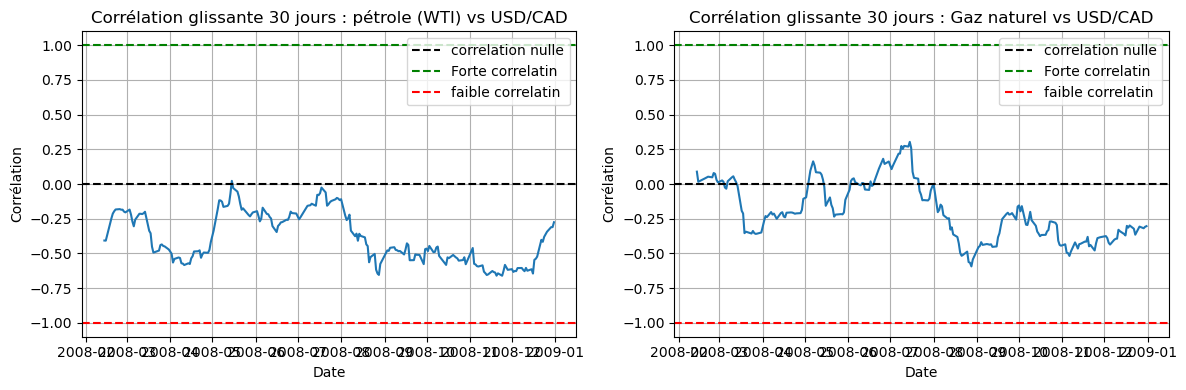

In [137]:
# Detecter les periodes a forte correlation
# Calculer la corrélation sur une fenêtre glissante (rolling window)
rolling_corr1 = df["CL=F"].pct_change().rolling(window=30).corr(df["CAD=X"].pct_change())
rolling_corr2 = df["NG=F"].pct_change().rolling(window=30).corr(df["CAD=X"].pct_change())
# Visualisation
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(rolling_corr1)
plt.axhline(0, color="black", linestyle="--",label="correlation nulle")
plt.axhline(1, color="green",linestyle="--",label="Forte correlatin")
plt.axhline(-1, color="red",linestyle="--",label="faible correlatin")
plt.title("Corrélation glissante 30 jours : pétrole (WTI) vs USD/CAD")
plt.xlabel("Date")
plt.ylabel("Corrélation")
plt.legend()
plt.grid()

plt.subplot(122)
plt.plot(rolling_corr2)
plt.axhline(0, color="black", linestyle="--",label="correlation nulle")
plt.axhline(1, color="green",linestyle="--",label="Forte correlatin")
plt.axhline(-1, color="red",linestyle="--",label="faible correlatin")
plt.title("Corrélation glissante 30 jours : Gaz naturel vs USD/CAD")
plt.xlabel("Date")
plt.ylabel("Corrélation")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

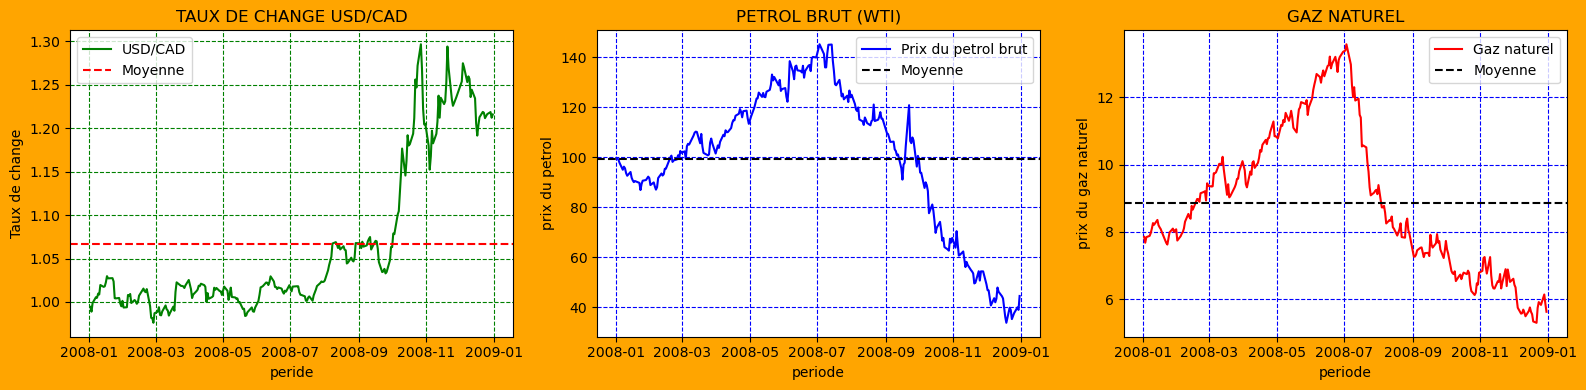

In [138]:
#Visualisation graphique de baase (PLOT)
plt.figure(facecolor="orange",figsize=(16,4))
plt.subplot(131)
plt.plot(df["CAD=X"], color="g",label="USD/CAD")
plt.title("TAUX DE CHANGE USD/CAD")
plt.xlabel("peride")
plt.axhline(df["CAD=X"].mean(),color="red",linestyle="--",label="Moyenne")
plt.ylabel("Taux de change")
plt.grid(linestyle="--",color="g")
plt.legend()
plt.subplot(132)
plt.plot(df["CL=F"], color="b",label="Prix du petrol brut")
plt.title("PETROL BRUT (WTI)")
plt.xlabel("periode")
plt.axhline(df["CL=F"].mean(),color="black",linestyle="--",label="Moyenne")
plt.ylabel("prix du petrol")
plt.grid(linestyle="--",color="b")
plt.legend()
plt.subplot(133)
plt.plot(df["NG=F"], color="red",label="Gaz naturel")
plt.title("GAZ NATUREL")
plt.xlabel("periode")
plt.axhline(df["NG=F"].mean(),color="black",linestyle="--",label="Moyenne")
plt.ylabel("prix du gaz naturel")
plt.grid(linestyle="--",color="b")
plt.legend()
plt.tight_layout()
plt.show()

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


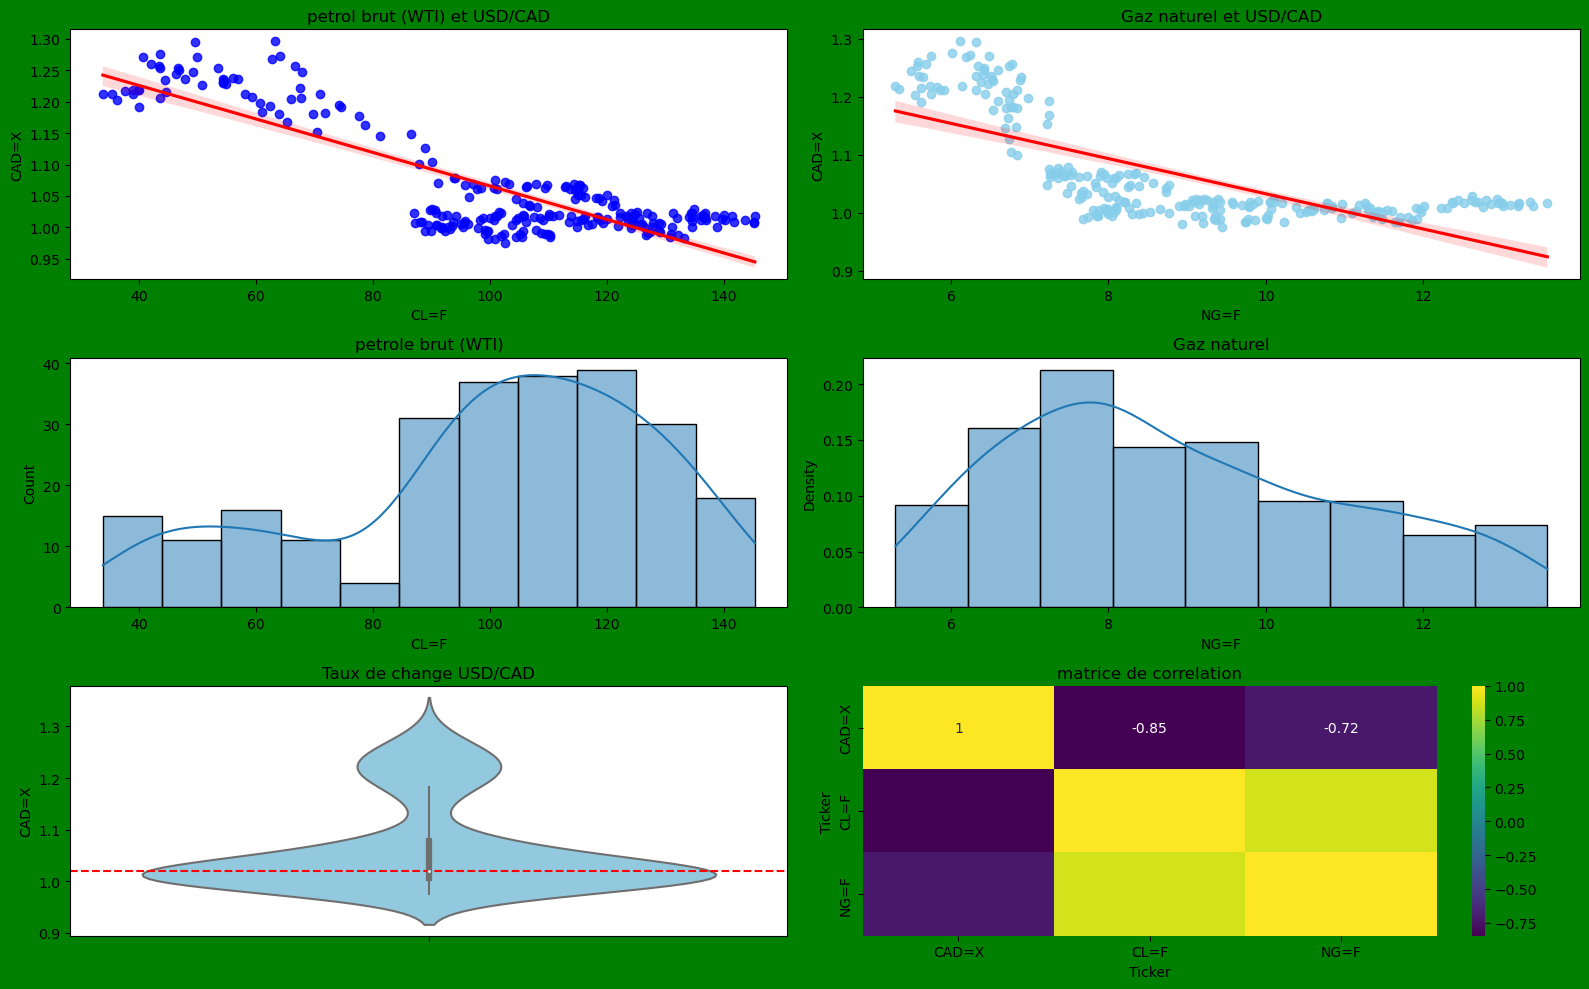

In [151]:
#Visualisation graphique avance (VIOLONPLOT, DISTPLOT et NUAGES)
plt.figure(facecolor="green",figsize=(16,10))
#Diagramme de dispersion et droite de regression
plt.subplot(321)
sns.regplot(x=df["CL=F"],y=df["CAD=X"],scatter_kws={"color":"b"},line_kws={"color":"red"})
plt.title("petrol brut (WTI) et USD/CAD")
plt.subplot(322)
sns.regplot(x=df["NG=F"],y=df["CAD=X"],scatter_kws={"color":"skyblue"},line_kws={"color":"red"})
plt.title("Gaz naturel et USD/CAD")
#Histogramme
plt.subplot(323)
sns.histplot(x=df["CL=F"],kde=True,stat="count")
plt.title("petrole brut (WTI)")
plt.subplot(324)
sns.histplot(x=df["NG=F"],kde=True,stat="density")
plt.title("Gaz naturel")
#Courbe a violon
plt.subplot(325)
sns.violinplot(y=df["CAD=X"],color="skyblue")
plt.axhline(df["CAD=X"].median(),color="red",linestyle="--")
plt.title("Taux de change USD/CAD")
#Matrice de correlation
plt.subplot(326)
sns.heatmap(df.corr(), annot=True, cmap="viridis")
plt.title("matrice de correlation")
plt.tight_layout()
plt.show() 

In [152]:
#Regression linéaire simple
Y=df["CAD=X"]
X=df[["CL=F","NG=F"]]
X=sm.add_constant(X)
modele=sm.OLS(Y,X).fit()
print(modele.summary())

#Les estimateurs du modeles
a0=modele.params.loc["const"]
a1=modele.params.loc["CL=F"]
a2=modele.params.loc["NG=F"]
dict={"Constant":[a0],"Petrol":[a1],"Gaz":[a2]}
print("Les parametres estimes :")
pd.DataFrame(dict).T

                            OLS Regression Results                            
Dep. Variable:                  CAD=X   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     310.3
Date:                Wed, 13 Aug 2025   Prob (F-statistic):           4.15e-68
Time:                        22:52:05   Log-Likelihood:                 405.64
No. Observations:                 250   AIC:                            -805.3
Df Residuals:                     247   BIC:                            -794.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3267      0.013    102.081      0.0

,0
Constant,1.326692
Petrol,-0.002822
Gaz,0.002411
